<a href="https://colab.research.google.com/github/sam2005-max/Supermarket_analysis/blob/main/Market_analiys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt


In [47]:
data0 = pd.read_csv('/content/sample_data/sotuvlar (3).csv')
data0

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Biz hulosa qiladigan boʻlsak bu yerda biz qaysidur bita Super Marketni bir oylik maʼlumotlarini olganmiz va buni tahlil qilib vizuvalizatsiya koʻrinishida  koʻrishimiz mumkin yaʼni statistika koʻrinishida

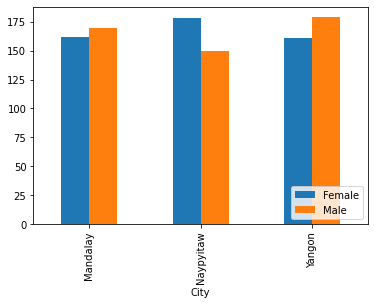

In [ ]:
sets_data = data0.groupby(['Gender','City']).count()['Invoice ID']
sets_data.unstack(level=0).plot(kind = 'bar')
plt.legend(loc = 'lower right')


#2
Bu yerda biz supermarketning 3ta filialini tahlil qildik yani supermarketning qaysi shahardagi filialiga qancha odam kiradi. Bu yerda koʻrishimiz mumkin deyarli hamma filialida odam soni bir hil, shuning uchun biz qaysi shaharda erkak haridorlar koʻpmi yoki ayol haridorlar koʻpmi? degan savolga tahlil natijasidan javob olamiz. 
1.Mandalay shahrimizda erkaklar ayolarga nisbatan ko'proq.
2.Naypyitaw shahrimizda erkaklar ayolarga nisbatan kamroq.
3.Yangon shaxrimizda erkaklar ayolarga nisbatan ko'proq.

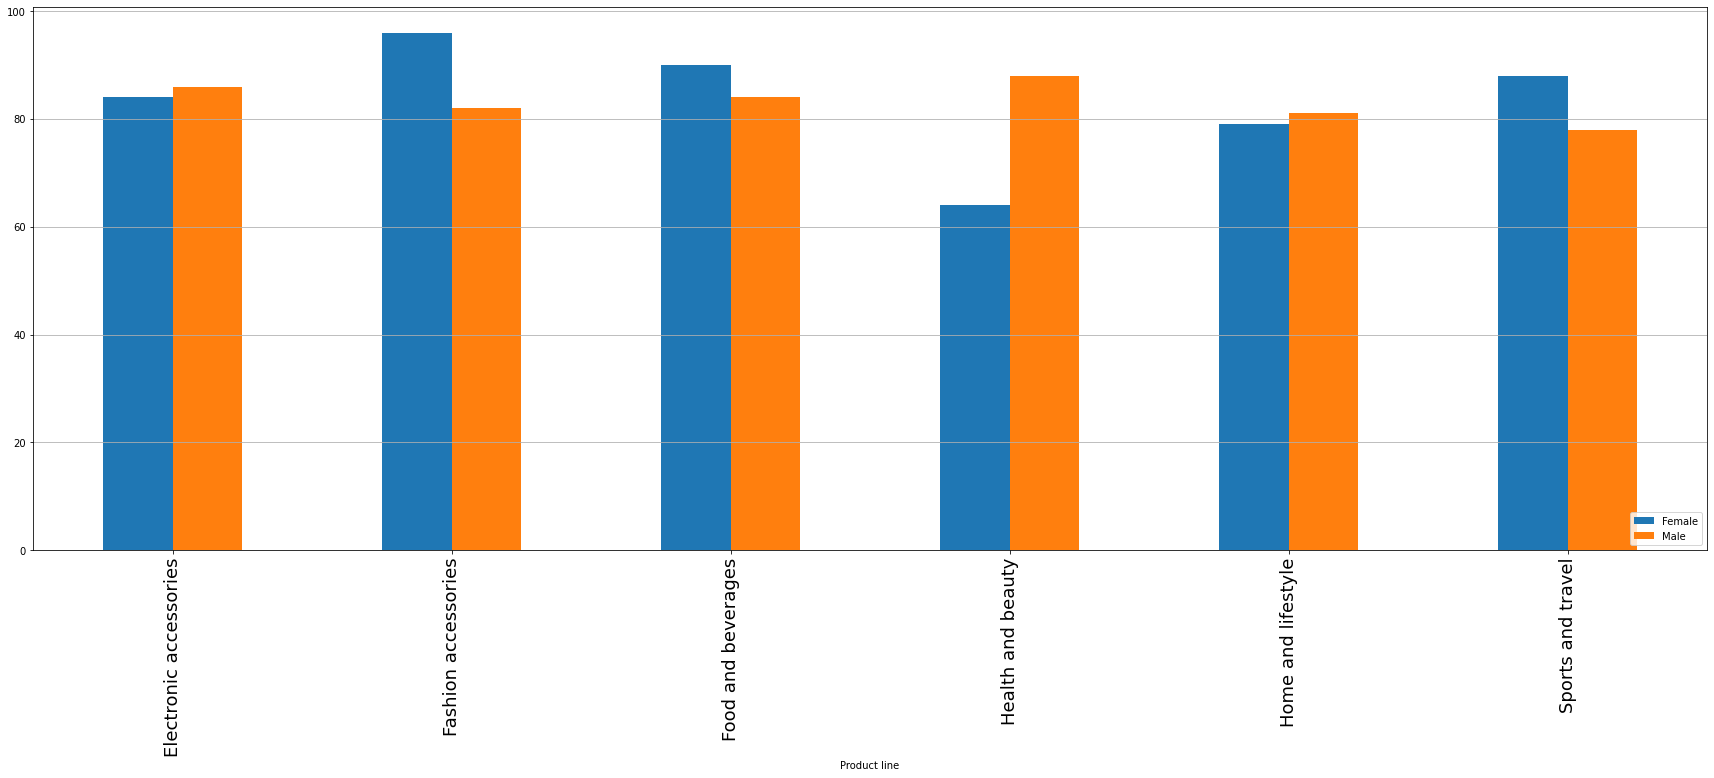

In [67]:
data0.groupby(['Gender','Product line']).count()['Invoice ID']
sales_gender = data0.groupby(['Gender','Product line']).count()['Invoice ID']
sales_gender.unstack(level=0).plot(kind = 'bar', figsize=(30,10))
plt.xticks(rotation='vertical', size=18)
plt.legend(loc = 'lower right')
plt.grid(axis = 'y')

#3
Bu yerda esa biz 'Product line' va 'Gender' yani qaysi maxsulot qatoridan kim yani erkar yoki ayol korpoq mahsulot hariq qilganini analis qilingan statistikasini ko'rishimiz mumkin.
1.Electronic accessoies qatoridan ayollarga nisbatan erkaklar ko'proq mahsulot olishgan.
2.Fashion accessories erkaklarga nisbatan ayolar ko'proq mahsulot harid qilgan.
3.Food and beverages qatoridan esa erkaklarga nisbatan ayollar ko'proq mahsulot harid qilgan.
4.Helth and beauty qatoridan ayollarga nisbatan erkakalar ko'proq mahsulot olgan.
5.Home and lifestyle qatoridan ayollarga nisbatan erkaklar ko'proq mahsulot harid qilgan.
5.Sports and travel qatorida erkaklar ga nisbatan ayollar ko'proq mahsulot harid qilgan.

In [ ]:
pd.to_datetime(data0['Date'])

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [57]:
pd.to_datetime(data0['Date']).dt.day
pd.to_datetime(data0['Date']).dt.month
pd.to_datetime(data0['Date']).dt.year
data0['Day'] = pd.to_datetime(data0['Date']).dt.day
data0['Month'] = pd.to_datetime(data0['Date']).dt.month
data0['Year'] = pd.to_datetime(data0['Date']).dt.year
data0.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,25,3,2019
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,25,2,2019
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,24,2,2019
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,10,1,2019
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,20,2,2019


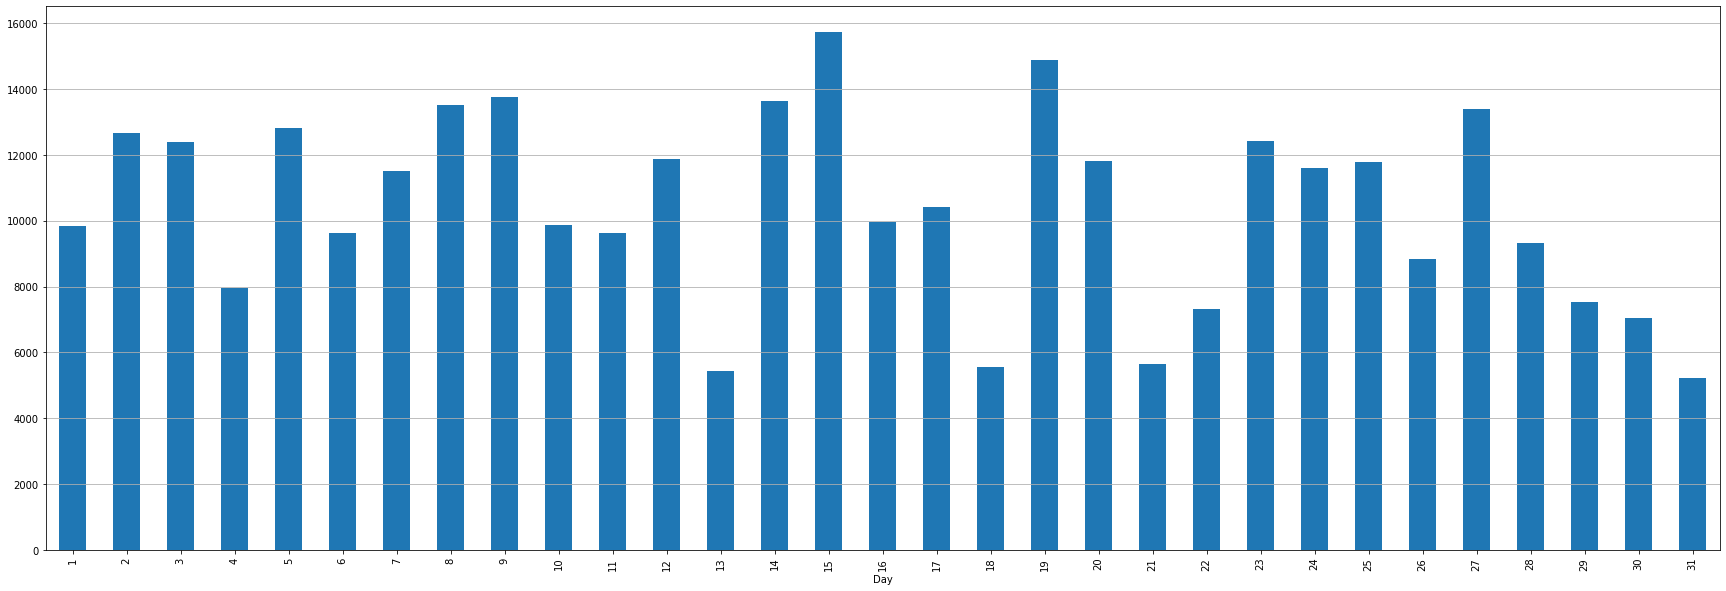

In [62]:
data0.groupby('Day').sum()['Total'].plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')

#4 bu erda biz kunlik 'Total' yani kunlik tushum statistikasini ko'rishimiz mumkin.


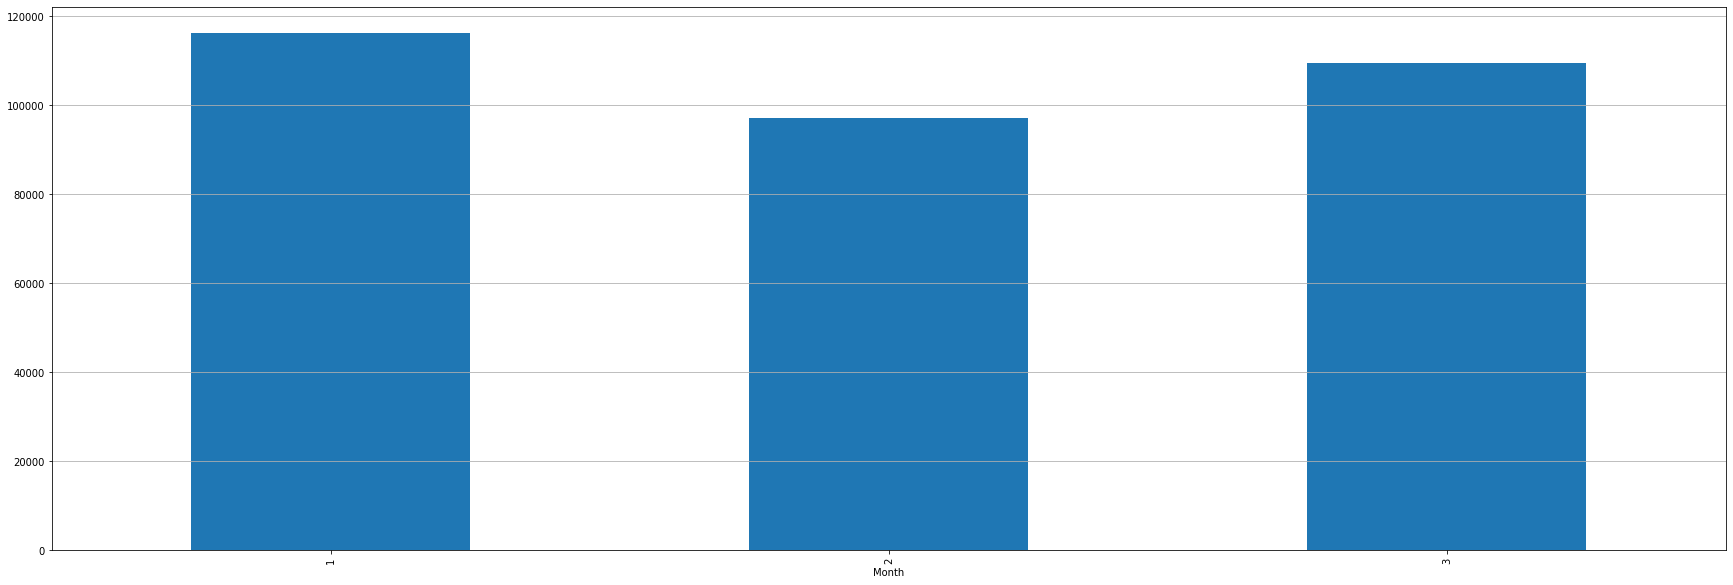

In [61]:

data0.groupby('Month').sum()['Total'].plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')

In [ ]:
data0['Time']
pd.to_datetime(data0['Time'])
data0['Hour'] = pd.to_datetime(data0['Time']).dt.hour
data0.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,...,18:30,Ewallet,597.73,4.761905,29.8865,4.1,25,3,2019,18
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,...,14:36,Ewallet,413.04,4.761905,20.6520,5.8,25,2,2019,14
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,...,11:38,Ewallet,735.60,4.761905,36.7800,8.0,24,2,2019,11
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,...,17:15,Credit card,72.52,4.761905,3.6260,7.2,10,1,2019,17
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,...,13:27,Credit card,164.52,4.761905,8.2260,5.9,20,2,2019,13


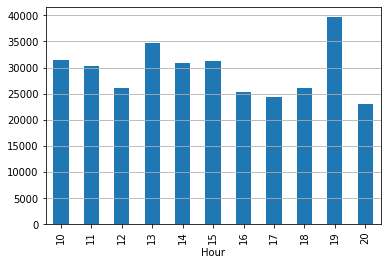

In [ ]:
data0.groupby('Hour').sum()['Total'].plot(kind = 'bar')
plt.grid(axis = 'y')

#5 bu yerda soat nechida qanda daromad topilganini ko'rishingiz mumkin

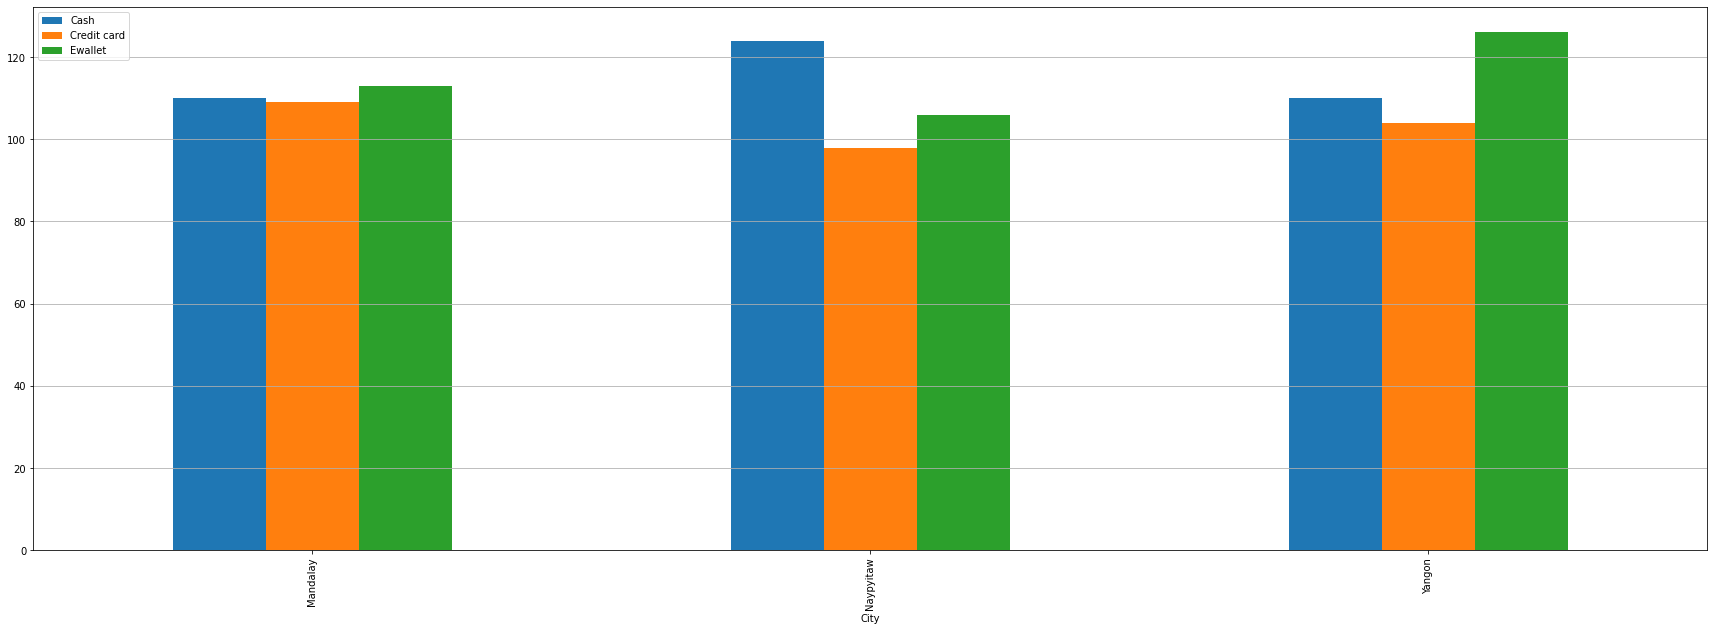

In [69]:
data0.groupby(['Payment','City']).count()["Customer type"].unstack(level = 0).plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')
plt.legend(loc = 'upper left')

#6 bu erda har bir shaharda tolov usuli qanday ko'rinishdaligini ko'rishimiz mumkin mumkin 

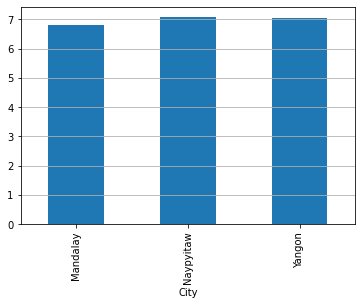

In [ ]:
raiting = data0.groupby(['City']).mean()['Rating']
raiting.plot(kind = 'bar')
plt.grid(axis = 'y')

#7 bu yerda 3 ta filialning reyningini ko'rishimiz mumkin

In [50]:
royxatlar = []
a = data0['Product line']
for i in a:
  royxatlar.append(i)
d = {}
for sana in royxatlar:
    d[sana] = royxatlar.count(sana)
data = {"Words" : d.keys(), "Count" : d.values()}
dfg = pd.DataFrame(data)
dfg = dfg.sort_values("Count")
ready = dfg.tail()


fig = px.bar(ready, y="Words", x="Count", color=ready.index)
fig.show()

In [51]:
royxatlar1 = []
a = data0['Gender']
for i in a:
  royxatlar1.append(i)
d = {}
for sana in royxatlar1:
    d[sana] = royxatlar1.count(sana)
data = {"Words" : d.keys(), "Count" : d.values()}
dfg = pd.DataFrame(data)
dfg = dfg.sort_values("Count")
ready = dfg.tail()


fig = px.bar(ready, y="Words", x="Count", color=ready.index)
fig.show()

In [54]:
royxatlar2 = []
a = data0['Customer type']
for i in a:
  royxatlar2.append(i)
d = {}
for sana in royxatlar2:
    d[sana] = royxatlar2.count(sana)
data = {"Words" : d.keys(), "Count" : d.values()}
dfg = pd.DataFrame(data)
dfg = dfg.sort_values("Count")
ready = dfg.tail()


fig = px.bar(ready, y="Words", x="Count", color=ready.index)
fig.show()

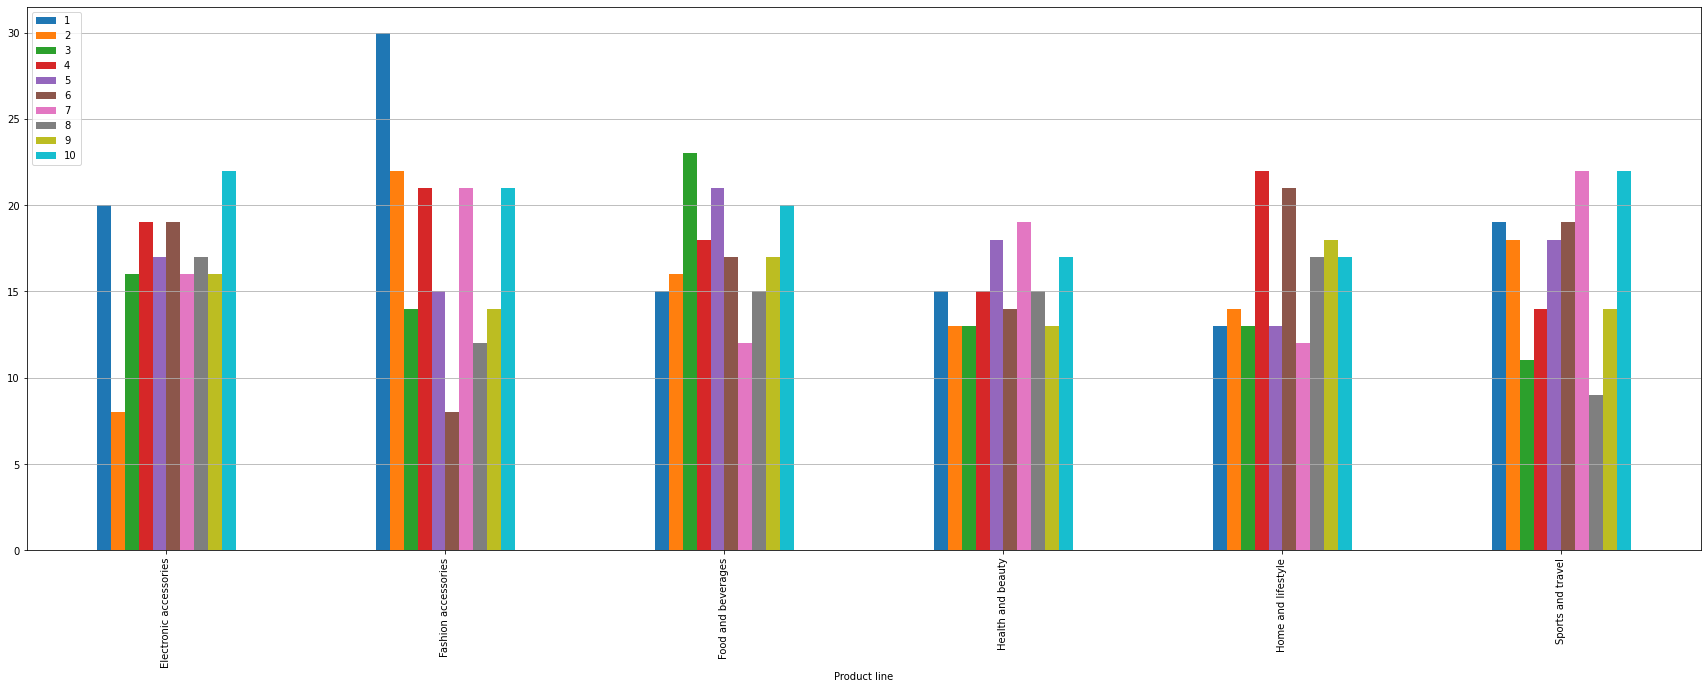

In [59]:
data0.groupby(['Quantity','Product line']).count()["Day"].unstack(level = 0).plot(kind = 'bar', figsize=(30,10))
plt.grid(axis = 'y')
plt.legend(loc = 'upper left')